In [1]:
class Faculty:
    def __init__(self, name, title, profile_url):
        self.name = name
        self.title = title
        self.profile_url = profile_url
        self.research_areas = []
        self.email = ""
        self.website = ""
        self.biography = ""

In [2]:
import requests
from bs4 import BeautifulSoup
import csv

def get_professor_data(faculty):
    # Fetch the page content

    url = faculty.profile_url
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    # Extract Name
    name_tag = soup.find('h1', class_='page-title')
    name = name_tag.span.text.strip() if name_tag else "N/A"

    # Extract Research Areas
    research_areas_tag = soup.find('strong', string="Research Areas:")
    if research_areas_tag:
       research_areas = research_areas_tag.find_parent('p').get_text(strip=True).replace('Research Areas:', '').strip()
    else:
        research_areas = []

    # Extract Email
    email_tag = soup.find('p', class_='card-block__text').find('a', href=lambda href: href and href.startswith('mailto:'))
    email = email_tag.get_text(strip=True) if email_tag else "N/A"

    # Extract Website
    website_tag = soup.find('p', class_='card-block__text').find('a', href=lambda href: href and href.startswith('http'))
    website = website_tag.get_text(strip=True) if website_tag else "N/A"

    # Extract Biography
    biography_tag = soup.find('div', class_='field--name-field-person-biography')
    biography = biography_tag.get_text(strip=True) if biography_tag else "N/A"

    faculty.research_areas = research_areas
    faculty.email = email
    faculty.website = website
    faculty.biography = biography

    return faculty

In [3]:
import requests
from bs4 import BeautifulSoup

base_url = "https://scs.gatech.edu/people/faculty/"

faculty_list = []
# Loop through each letter (A to Z)
for letter in "abcdefghijklmnopqrstuvwxyz":
    url = base_url + letter
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")

        # Find all faculty blocks
        faculty_blocks = soup.find_all("div", class_="profile-card__content")

        for faculty in faculty_blocks:
            name = faculty.find("h4", class_="card-block__title").get_text(strip=True)
            title = faculty.find("h6", class_="card-block__subtitle").get_text(strip=True)
            profile_url = "https://scs.gatech.edu" + faculty.find("a")["href"]

            faculty_det = Faculty(name, title, profile_url)
            faculty_det = get_professor_data(faculty_det)
            faculty_list.append(faculty_det)

            # Print the details
            print(f"Name: {faculty_det.name}")
            print(f"Title: {faculty_det.title}")
            print(f"Profile URL: {faculty_det.profile_url}")
            print(f"Research Areas: {faculty_det.research_areas}")
            print(f"Email: {faculty_det.email}")
            print(f"Website: {faculty_det.website}")
            print("-" * 40)
    else:
        print(f"Failed to retrieve the page for letter {letter}. Status code: {response.status_code}")

Name: Jacob Abernethy
Title: Associate Professor
Profile URL: https://scs.gatech.edu/people/jacob-abernethy
Research Areas: Machine Learning
Email: prof@gatech.edu
Website: N/A
----------------------------------------
Name: Mustaque Ahamad
Title: USG Regents Entrepreneur Professor
Profile URL: https://scs.gatech.edu/people/mustaque-ahamad
Research Areas: Cybersecurity, Distributed Systems
Email: mustaque.ahamad@cc.gatech.edu
Website: N/A
----------------------------------------
Name: Mostafa Ammar
Title: Regents' Professor, Interim Chair of SCS
Profile URL: https://scs.gatech.edu/people/mostafa-ammar
Research Areas: Networking
Email: ammar@cc.gatech.edu
Website: N/A
----------------------------------------
Name: Joy Arulraj
Title: Associate Professor
Profile URL: https://scs.gatech.edu/people/joy-arulraj
Research Areas: Database systems, machine learning
Email: jarulraj3@gatech.edu
Website: N/A
----------------------------------------
Name: Ramin Ayanzadeh
Title: Postdoctoral Fellow
Pr

In [4]:
with open('faculty_details.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Name", "Title", "Profile URL", "Research Areas", "Email", "Website", "Biography"])
    for faculty in faculty_list:
        writer.writerow([faculty.name, faculty.title, faculty.profile_url, faculty.research_areas, faculty.email, faculty.website, faculty.biography])

In [ ]:
import pandas as pd

# Load the data from a TSV file (tab-separated values)
file_path = "faculty_details.csv" 
df = pd.read_csv(file_path, sep=",")

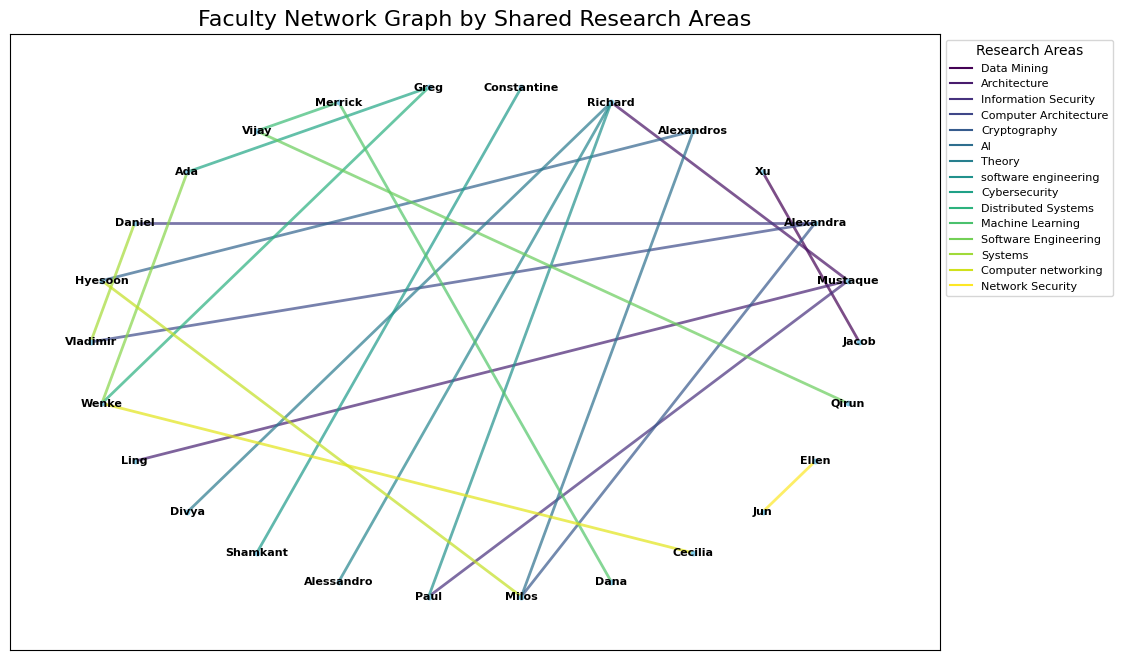

In [34]:
# Draw the graph
plt.figure(figsize=(12, 8))

# Use circular layout to place nodes at equal distance
pos = nx.circular_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=10)  # Smaller nodes

# Draw edges with increased width and better visibility
edge_colors = range(len(G.edges))
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, width=2, alpha=0.7)

# Add node labels (first names)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black", font_weight="bold")

# Add legend for edges with research areas
unique_areas = list(set(edge_labels.values()))  # Get unique research area labels
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=len(unique_areas) - 1)

for idx, area in enumerate(unique_areas):
    plt.plot([], [], color=cmap(norm(idx)), label=area)  # Create proxy handles for legend

plt.legend(title="Research Areas", loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)

# Add a title
plt.title("Faculty Network Graph by Shared Research Areas", fontsize=16)

# Display the graph
plt.show()

In [25]:
print("Edges with Shared Research Areas:")
for (node1, node2), area in edge_labels.items():
    print(f"Edge between {node1} and {node2} - Research Areas: {area}")

Edges with Shared Research Areas:
Edge between Jacob and Xu - Research Areas: Machine Learning
Edge between Mustaque and Richard - Research Areas: Cybersecurity
Edge between Mustaque and Ling - Research Areas: Distributed Systems
Edge between Mustaque and Paul - Research Areas: Cybersecurity
Edge between Alexandra and Daniel - Research Areas: Cryptography
Edge between Alexandra and Vladimir - Research Areas: Cryptography
Edge between Alexandra and Milos - Research Areas: Information Security
Edge between Alexandros and Hyesoon - Research Areas: Architecture
Edge between Alexandros and Milos - Research Areas: Architecture
Edge between Richard and Divya - Research Areas: Computer Architecture
Edge between Richard and Alessandro - Research Areas: Software Engineering
Edge between Richard and Paul - Research Areas: Cybersecurity
Edge between Constantine and Shamkant - Research Areas: Data Mining
Edge between Greg and Ada - Research Areas: Systems
Edge between Greg and Wenke - Research Area